In [3]:
#from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np 

In [9]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()
x_train = x_train_full[:1000]
y_train = y_train_full[:1000]
x_test = x_test_full[:200]
y_test = y_test_full[:200]

In [10]:
def preprocess_images(images):
    processed_images = []
    for img in images:
        img_pil = tf.keras.preprocessing.image.array_to_img(img)
        img_resized = img_pil.resize((224, 224))
        img_array = img_to_array(img_resized)
        processed_images.append(img_array)
    processed_images = np.array(processed_images)
    processed_images = preprocess_input(processed_images)
    return processed_images
x_train_pp = preprocess_images(x_train)
x_test_pp = preprocess_images(x_test)

In [11]:
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 133s 2us/step


In [ ]:
for TT in base_model.layers:
    TT.trainable = False
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [16]:
model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train_pp, y_train_cat,epochs=10,batch_size=32,validation_data=(x_test_pp, y_test_cat))
loss, accuracy = model.evaluate(x_test_pp, y_test_cat)
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.0958 - loss: 3.0982 - val_accuracy: 0.1300 - val_loss: 2.4875
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.1843 - loss: 2.3433 - val_accuracy: 0.2400 - val_loss: 2.0817
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.3227 - loss: 1.9076 - val_accuracy: 0.3400 - val_loss: 1.7747
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.4476 - loss: 1.6042 - val_accuracy: 0.4750 - val_loss: 1.5418
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.5747 - loss: 1.3103 - val_accuracy: 0.5350 - val_loss: 1.3698
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.6498 - loss: 1.1411 - val_accuracy: 0.6000 - val_loss: 1.2372
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.6775 - loss: 1.0029 - val_accuracy: 0.6500 - val_loss: 1.1314
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.7250 - loss: 0.9017 - val_accuracy: 0.6800 - val_los

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.1 MB 1.6 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.6 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 1.7 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.5 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.3 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.2 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.1 MB 1.2 MB/s eta 0:00:05
   --------------- ------------

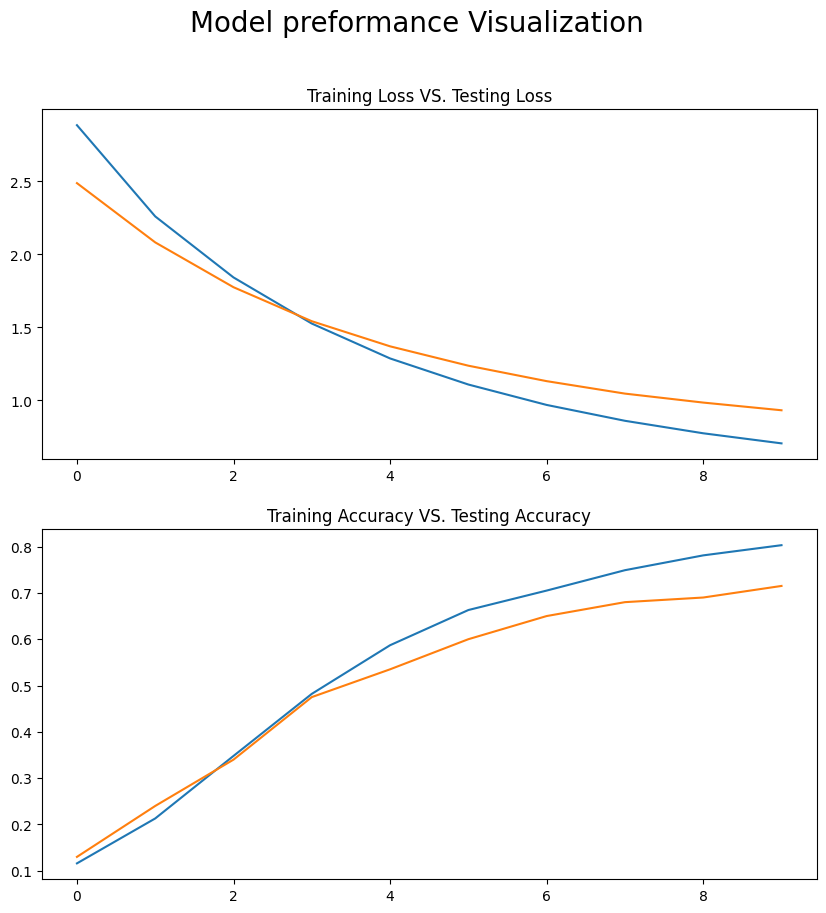

In [21]:
!pip install matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle("Model preformance Visualization",fontsize=20)
ax[0].plot(model.history.history['loss'],label='Training Loss')
ax[0].plot(model.history.history['val_loss'],label='Testing Loss')
ax[0].set_title("Training Loss VS. Testing Loss")

ax[1].plot(model.history.history['accuracy'],label='Training Accuracy')
ax[1].plot(model.history.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title("Training Accuracy VS. Testing Accuracy")
plt.show()